# Data Visualization with Seaborn


## 1. Business Understanding




As a data analyst working with Quick Mart chain of supermarkets, the task is to create an analysis report, complete with recommendations to guide the management team on a marketing strategy decision.

The report should include:
- Which product categories performed best.
- Which branches had the highest sales and profits
- What key trends in sales in each branch are noticeable over the time.
- The average amount spent by customers for each branch.
The average rating for each branch.

## 2. Data Exploration

In [ ]:
# Loading libraries
# ---
# 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
 

In [ ]:
# Loading the dataset
# --- 
# Dataset url = https://bit.ly/SupermarketsDS
# --- 
df=pd.read_csv("https://bit.ly/SupermarketsDS")


In [ ]:
# Determining the size 
# ---
df.shape

(1000, 17)

In [ ]:
# Checking the datatypes
# ---
df.dtypes

In [ ]:
# Statistical summary
# ---

df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## 3. Data Cleaning

In [ ]:
# Checking for duplicates 
# ---
sum(df.duplicated())

0

In [ ]:
# Checking for missing values 
# ---
df.isnull().sum()

In [ ]:
# Dropping irrelevant columns
df= df.drop(['Invoice ID','Tax 5%'],axis='columns', inplace=True)

## 4. Data analysis and visualisation (Using Seaborn for visualisation)

We investigate the questions listed above in order to craft a fact-driven recommendation.

### 4.a) Questions

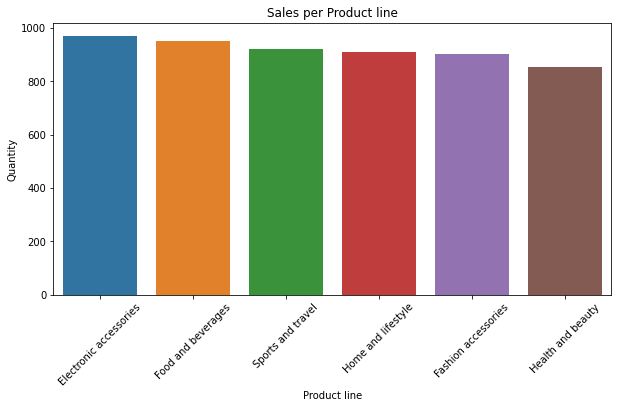

In [ ]:
# Question 1 - Which product categories(Product_line) performed best.

ProductPerformance=df.groupby(['Product line']).sum().reset_index()
ProductPerformance=ProductPerformance.sort_values(by='Quantity', ascending=0)

# Prepare
plt.figure(figsize=(10, 5))
Productline= ProductPerformance['Product line']
Quantity =  ProductPerformance['Quantity']

# Render vertical bar chart
sns.barplot(data = ProductPerformance, x = "Product line", y = "Quantity")

# Tweak and Label  
plt.xticks(rotation = 45)
plt.ylabel('Quantity')
plt.title('Sales per Product line')

# Display
plt.show()


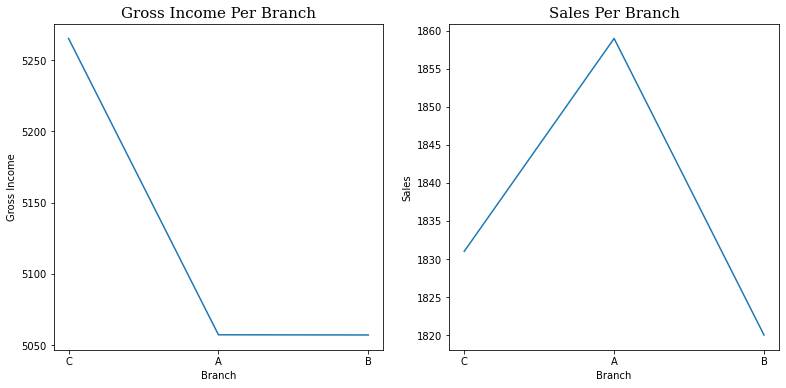

In [ ]:
# Question 2: Which branches had the highest sales and profits ?

BranchPerformance=df.groupby(['Branch']).sum().reset_index()
BranchPerformance=BranchPerformance.sort_values(by='gross income', ascending=0)

# Render a plot

fig, ax = plt.subplots(1, 2, figsize=(13, 6)) 
Branch=BranchPerformance['Branch']
gross_income= BranchPerformance['gross income']
sales= BranchPerformance['Quantity']

fig, ax = plt.subplots(1, 2, figsize=(13, 6)) 
ax1 = sns.lineplot(data = BranchPerformance, x = Branch, y = gross_income,ax = ax[0])
ax2 = sns.lineplot(data = BranchPerformance, x = Branch, y = sales,ax = ax[1])
# Add a title 
ax1.set_title('Gross Income Per Branch', fontdict= {'fontname': 'Serif', 'fontsize': 15})
ax2.set_title('Sales Per Branch', fontdict= {'fontname': 'Serif', 'fontsize': 15})

# Add an x-axis label
ax1.set_xlabel('Branch')
ax2.set_xlabel('Branch')

# Add a y-axis label
ax1.set_ylabel('Gross Income')
ax2.set_ylabel('Sales')
# Add a legend


# Display the plot
plt.show()



In [ ]:
BranchPerformance

,Branch,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,A,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2
1,B,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6
2,C,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9


In [ ]:
# Question 3: What key trends in sales in each branch are noticeable over the time.


sns.pairplot(BranchPerformance)

# Display
plt.show()



In [ ]:
# Question 4(a): The average amount spent by customers for each branch.



Avg_Percustomer_PerBranch=df.groupby(['Branch']).mean().reset_index()
Avg_Percustomer_PerBranch[[	'Branch', 'Total']]




,Branch,Total
0,A,312.354031
1,B,319.872506
2,C,337.099715


In [ ]:
# Question 4(b):The average rating for each branch.

Avg_Rating_PerBranch=df.groupby(['Branch']).mean().reset_index()
Avg_Rating_PerBranch[['Branch', 'Rating']]



,Branch,Rating
0,A,7.027059
1,B,6.818072
2,C,7.072866


## 5. Summary of findings

What observations did you make from your analysis?
1. Electronics accessories line made the most of item sales

2. Branch C made the highest profit

3. Branch C was the highest rated

4. Health and Beauty line has the least quantity of items sold

## 6. Recommendations

What recommendations can you make from your analysis/observations?

1. Improve customer service in Branch B to increase customer ratings
2. Do a promotion on Health and Beauty Items

